### 데이터  
- 사이트: https://www.crimestats.or.kr/portal/stat/easyStatPage.do
- 통계표 이름: 「범죄분석」DB 범죄자 연령
- 일괄설정  
  항목 -> 소년  
  분류 -> 전체  
  검색기간 -> 2019년
  
google drive에 올린 후 1, 2행/F, Q, R 열 삭제,  파일->다운로드->쉼표로구분된값 저장  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [3]:
# 데이터 불러오기
df = pd.read_csv('범죄자 연령.csv', sep = ',', thousands = ',') 
df.head()

,No,자료시점,분류,분류.1,분류.2,소년(소계),14세미만,14세,15세,16세,17세,18세
0,1,2019년,계,계[입력치],계[입력치],66247.0,NaN,9053.0,11730.0,13548.0,14338.0,17578.0
1,2,2019년,형법범,형법범계[입력치],형법범계[입력치],54497.0,NaN,8322.0,10399.0,11105.0,11090.0,13581.0
2,3,2019년,형법범,재산범죄,재산범죄의 계[입력치],27809.0,NaN,5077.0,5802.0,6202.0,5274.0,5454.0
3,4,2019년,형법범,재산범죄,배임,1.0,NaN,0.0,0.0,0.0,0.0,1.0
4,5,2019년,형법범,재산범죄,사기,8088.0,NaN,609.0,1023.0,1762.0,2044.0,2650.0


In [4]:
df.dtypes

No          int64
자료시점       object
분류         object
분류.1       object
분류.2       object
소년(소계)    float64
14세미만     float64
14세       float64
15세       float64
16세       float64
17세       float64
18세       float64
dtype: object

In [5]:
# 필요없는 컬럼 제거
df = df.drop(['No','자료시점','분류','분류.1','14세미만'], axis=1).copy()
df.head()

,분류.2,소년(소계),14세,15세,16세,17세,18세
0,계[입력치],66247.0,9053.0,11730.0,13548.0,14338.0,17578.0
1,형법범계[입력치],54497.0,8322.0,10399.0,11105.0,11090.0,13581.0
2,재산범죄의 계[입력치],27809.0,5077.0,5802.0,6202.0,5274.0,5454.0
3,배임,1.0,0.0,0.0,0.0,0.0,1.0
4,사기,8088.0,609.0,1023.0,1762.0,2044.0,2650.0


In [6]:
# 컬럼명 변경
df.rename(columns={'분류.2':'범죄유형', '소년(소계)':'소계'}, inplace=True)

In [7]:
df.isnull().sum()

범죄유형    0
소계      1
14세     1
15세     1
16세     1
17세     1
18세     1
dtype: int64

In [8]:
df = df.dropna() # 결측치 제거

In [9]:
# 연령별 계만 추출
df_sum = df.loc[[0], :] # []안의 행 자리에 선택할 행의 index list, 열자리에 ':'
df_sum

,범죄유형,소계,14세,15세,16세,17세,18세
0,계[입력치],66247.0,9053.0,11730.0,13548.0,14338.0,17578.0


### 시각화하기

### 1. 연령별 소년범죄 비율 (18세>17세>16세>15세>14세)

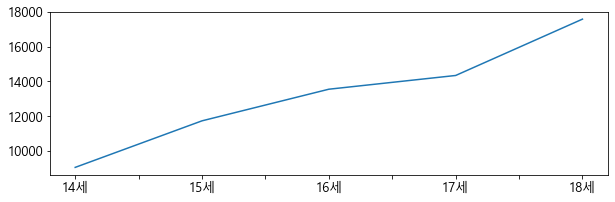

In [10]:
# 차트 크기 설정
plt.rcParams["figure.figsize"] = (14,8)
# 폰트 크기 설정
plt.rcParams["font.size"] = 13

# 선 그래프
df_sum.iloc[0][2:].plot(kind='line', rot=0, figsize=(10, 3))
plt.show()

In [11]:
# 연령별 소년범죄 비율 리스트화

sum = df_sum.iloc[0, 1]


ratio = []

for i in df_sum.iloc[0][2:]:
    ratio.append(i/sum*100)
    
print(ratio)

[13.665524476580071, 17.706462179419447, 20.450737391881894, 21.64324422237988, 26.534031729738704]


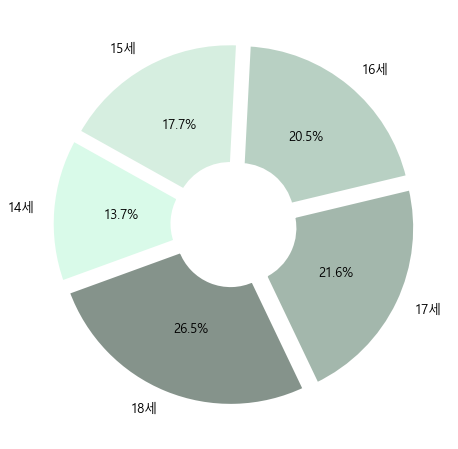

In [12]:
# 파이 그래프
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

labels = df_sum.columns[2:].tolist() # 컬럼명 리스트로 추출
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6'] # 다홍, 노랑, 민트, 연보라, 하늘색
colors = ['#D9FAE9', '#D6EEE0', '#B8D0C3', '#A3B7AC', '#85938B'] # 그라데이션
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# wedgeprops: 부채꼴 영역의 스타일 설정
# width’: 도넛 모양의 그래프에서 중심부의 크기
#'edgecolor’:각 조각의 테두리 색
#'linewidth’: 각 조각의 테두리 두께


plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=200, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### 2. 연령별 가장 많이 저지른 범죄 유형

In [13]:
# '계'가 들어 있지 않은 행만 추출
df = df[~df.범죄유형.str.contains('계')].copy()

# '범죄유형'를 인덱스로 설정
df.set_index("범죄유형", inplace = True)
df.head()

,소계,14세,15세,16세,17세,18세
범죄유형,,,,,,
배임,1.0,0.0,0.0,0.0,0.0,1.0
사기,8088.0,609.0,1023.0,1762.0,2044.0,2650.0
손괴,1124.0,138.0,169.0,219.0,218.0,380.0
장물,175.0,29.0,28.0,48.0,36.0,34.0
절도,17141.0,4175.0,4390.0,3885.0,2631.0,2060.0


### (1) 14세 (절도>폭행>상해>사기>성폭력)
- 재산범죄: 절도, 사기 (52.8%)
- 강력범죄(폭력): 폭행, 상해 (19.6%)

In [14]:
age14 = df[['14세']]
age14.head()

,14세
범죄유형,
배임,0.0
사기,609.0
손괴,138.0
장물,29.0
절도,4175.0


In [15]:
# 내림차순 정렬
age14_top5 = age14.sort_values('14세',ascending=False).head()
age14_top5

,14세
범죄유형,
절도,4175.0
폭행,1110.0
상해,664.0
사기,609.0
성폭력,416.0


In [16]:
sum14 = age14['14세'].sum()

# '기타' 행 추가
age14_top5.loc['기타'] = sum14 - age14_top5['14세'].sum()
age14_top5

,14세
범죄유형,
절도,4175.0
폭행,1110.0
상해,664.0
사기,609.0
성폭력,416.0
기타,2079.0


In [17]:
ratio14 = []

for i in age14_top5['14세']:
    ratio14.append(i/sum14*100)

print(ratio14)

[46.11730917927759, 12.26112890754446, 7.334585220368939, 6.72705180603115, 4.5951618248094555, 22.96476306196841]


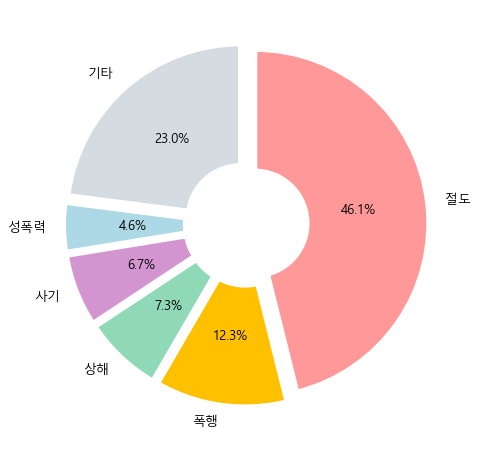

In [18]:
labels14 = age14_top5.index.tolist() # 인덱스 리스트로 추출

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio14, labels=labels14, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (2) 15세 (절도>폭행>사기>상해>도로교통법(무면허운전))
- 재산범죄: 절도, 사기 (46.1%)
- 강력범죄(폭력): 폭행, 상해 (21.9%)

In [19]:
age15 = df[['15세']]
age15.head()

,15세
범죄유형,
배임,0.0
사기,1023.0
손괴,169.0
장물,28.0
절도,4390.0


In [20]:
# 내림차순 정렬
age15_top5 = age15.sort_values('15세',ascending=False).head()
age15_top5

,15세
범죄유형,
절도,4390.0
폭행,1654.0
사기,1023.0
상해,917.0
도로교통법(무면허운전),673.0


In [21]:
sum15 = age15['15세'].sum()

# '기타' 행 추가
age15_top5.loc['기타'] = sum15 - age15_top5['15세'].sum()
age15_top5

,15세
범죄유형,
절도,4390.0
폭행,1654.0
사기,1023.0
상해,917.0
도로교통법(무면허운전),673.0
기타,3073.0


In [22]:
ratio15 = []

for i in age15_top5['15세']:
    ratio15.append(i/sum15*100)

print(ratio15)

[37.42540494458653, 14.100596760443306, 8.721227621483376, 7.817561807331629, 5.737425404944586, 26.197783461210573]


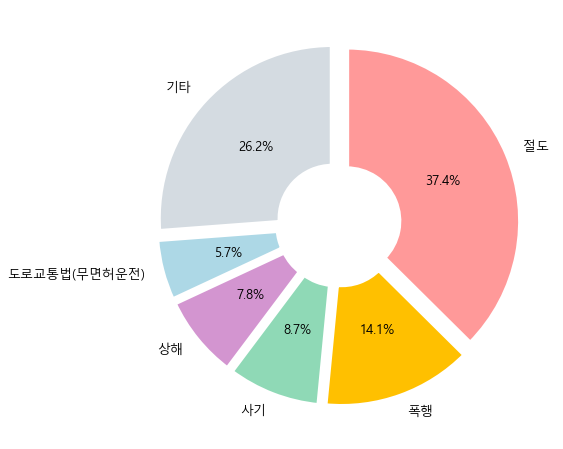

In [23]:
labels15 = age15_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio15, labels=labels15, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (3) 16세 (절도>사기>폭행>도로교통법(무면허운전)>상해)
- 재산범죄: 절도, 사기 (41.7%)
- 강력범죄(폭력): 폭행, 상해 (19.1%)

In [24]:
age16 = df[['16세']]
age16.head()

,16세
범죄유형,
배임,0.0
사기,1762.0
손괴,219.0
장물,48.0
절도,3885.0


In [25]:
# 내림차순 정렬
age16_top5 = age16.sort_values('16세',ascending=False).head()
age16_top5

,16세
범죄유형,
절도,3885.0
사기,1762.0
폭행,1711.0
도로교통법(무면허운전),919.0
상해,880.0


In [26]:
sum16 = age16['16세'].sum()

# '기타' 행 추가
age16_top5.loc['기타'] = sum16 - age16_top5['16세'].sum()
age16_top5

,16세
범죄유형,
절도,3885.0
사기,1762.0
폭행,1711.0
도로교통법(무면허운전),919.0
상해,880.0
기타,4391.0


In [27]:
ratio16 = []

for i in age16_top5['16세']:
    ratio16.append(i/sum16*100)

print(ratio16)

[28.675819309123117, 13.005609684086211, 12.6291703572483, 6.783289046353705, 6.495423678771775, 32.410687924416884]


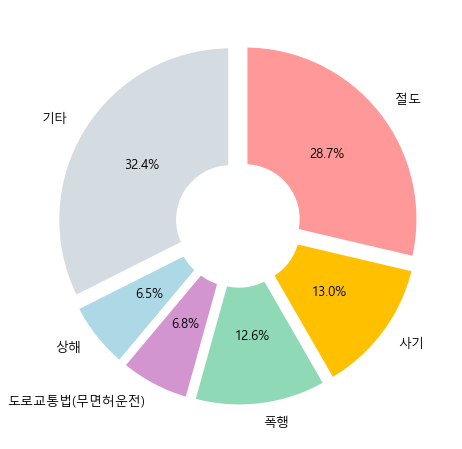

In [28]:
labels16 = age16_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio16, labels=labels16, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (4) 17세 (절도>폭행>사기>상해>도로교통법(무면허운전))
- 재산범죄: 절도, 사기 (32.6%)
- 강력범죄(폭력): 폭행, 상해 (22.2%)

In [29]:
age17 = df[['17세']]
age17.head()

,17세
범죄유형,
배임,0.0
사기,2044.0
손괴,218.0
장물,36.0
절도,2631.0


In [30]:
# 내림차순 정렬
age17_top5 = age17.sort_values('17세',ascending=False).head()
age17_top5

,17세
범죄유형,
절도,2631.0
폭행,2074.0
사기,2044.0
상해,1110.0
도로교통법(무면허운전),809.0


In [31]:
sum17 = age17['17세'].sum()

# '기타' 행 추가
age17_top5.loc['기타'] = sum17 - age17_top5['17세'].sum()
age17_top5

,17세
범죄유형,
절도,2631.0
폭행,2074.0
사기,2044.0
상해,1110.0
도로교통법(무면허운전),809.0
기타,5670.0


In [32]:
ratio17 = []

for i in age17_top5['17세']:
    ratio17.append(i/sum17*100)

print(ratio17)

[18.349839587111173, 14.465057888129445, 14.255823685311759, 7.741665504254429, 5.6423490026503, 39.54526433254289]


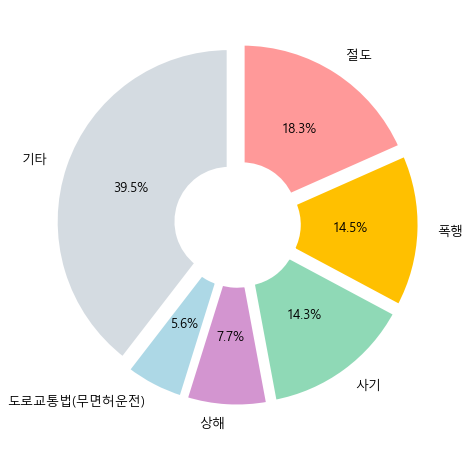

In [33]:
labels17 = age17_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio17, labels=labels17, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (5) 18세 (폭행>사기>절도>상해>교통사고처리특례법)
- 강력범죄(폭력): 폭행, 상해 (28.5%)
- 재산범죄: 사기, 절도 (26.8%)

In [34]:
age18 = df[['18세']]
age18.head()

,18세
범죄유형,
배임,1.0
사기,2650.0
손괴,380.0
장물,34.0
절도,2060.0


In [35]:
# 내림차순 정렬
age18_top5 = age18.sort_values('18세',ascending=False).head()
age18_top5

,18세
범죄유형,
폭행,3590.0
사기,2650.0
절도,2060.0
상해,1424.0
교통사고처리특례법,1035.0


In [36]:
sum18 = age18['18세'].sum()

# '기타' 행 추가
age18_top5.loc['기타'] = sum18 - age18_top5['18세'].sum()
age18_top5

,18세
범죄유형,
폭행,3590.0
사기,2650.0
절도,2060.0
상해,1424.0
교통사고처리특례법,1035.0
기타,6819.0


In [37]:
ratio18 = []

for i in age18_top5['18세']:
    ratio18.append(i/sum18*100)

print(ratio18)

[20.42325634315622, 15.075662760268518, 11.719194447604961, 8.101035385140516, 5.888041870519968, 38.79280919330982]


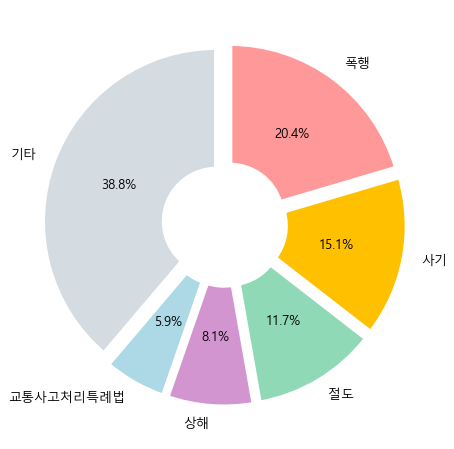

In [38]:
labels18 = age18_top5.index.tolist()

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] # 다홍, 노랑, 민트, 연보라, 하늘색, 회색
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio18, labels=labels18, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()